# Automates finis - TP 2 

### Objectif du TP

L'objectif de ce TP est d'implémenter la déterminisation d'un automate fini. Cela implique deux étapes : premièrement, étant donné un automate fini (potenitellement) non déterministe donné en entrée, il faut appliquer l'algorithme d'élimination des transitions epsilon. Deuxièmement, il faut appliquer l'algorithme de réduction des transitions de façon à créer des nouveaux états composés par des ensembles d'états joignables avec l'automate initial. Finalement, nous vous conseillons de renommer les états de l'automate déterminisé, par exemple, pour mieux le visualiser avec `to_graphviz`.

### Algorithme d'élimination des transitions epsilon

Dans la bibliothèque `automaton.py` fournie, les transitions epsilon sont représentées par le symbole `%` dans le fichier d'entrée. Ainsi, l'automate ci-dessous est une version non déterministe de l'automate qui reconnait l'expresison régulière `a*b*`:

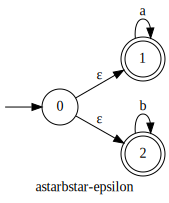

In [1]:
import automaton
a = automaton.Automaton("astarbstar-epsilon")
source = """0 % 1
1 a 1
0 % 2
2 b 2
A 1 2
"""
a.from_txt(source)
a

Dans l'algorithme d'élimination des transitions epsilon, nous devons tout d'abord identifier un état _k_ dans lequel aboutit une transition epsilon. Disons que c'est l'état 1. Ensuite, nous devons identifier tous les états _q_ menant à _k_ avec une transition epsilon (en l'occurrence, _q=0_ et _k=1_). Finalement, il faut rajouter des transitions depuis _q=0_ vers tous les états _r_ destination d'une transition qui part de _k_. Ici, _r=1_ et le symbole _x_ de cette nouvelle transition de _q_ vers _r_ est _a_. En somme, il faut rajouter une transition depuis _0_ vers _1_ avec _a_:

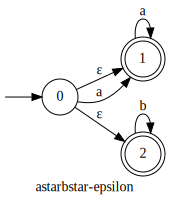

In [2]:
a.add_transition("0","a","1")
a

Puis, on peut supprimer la transition epsilon cible. Ici, l'état _1_ est un état d'acceptation, donc _0_ devient aussi un état d'acceptation:

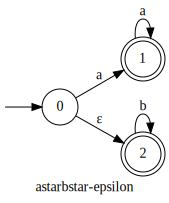

In [3]:
a.remove_transition("0","%","1")
a.make_accept("0")
a

Une fois que l'algorithme est appliqué à toutes les transitions epsilon, le résultat sera celui-ci :

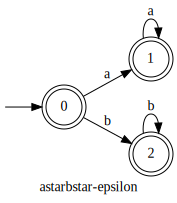

In [4]:
a.add_transition("0","b","2")
a.remove_transition("0","%","2")
a.make_accept("0") # Il l'est déjà, mais on doit être systématique
a

### Algorithme de réduction des transitions

TODO : compléter

# Travail à effectuer

TO UPDATE